In [9]:
from sympy import symbols, diff, solve, N, im
import sympy as sp

def count_minima_below_zero(poly_func):
    """
    Counts the number of minima of a polynomial function where x < 0.

    Parameters:
        poly_func (sympy expression): A polynomial function of a single variable.

    Returns:
        int: The number of minima where x < 0.
    """
    x = symbols('x')
    
    # First and second derivatives
    first_derivative = diff(poly_func, x)

    second_derivative = diff(first_derivative, x)
    
    # Solve for critical points
    critical_points = solve(first_derivative, x)
    
    minima_points = []
    for point in critical_points:
        # Filter out non-real critical points
        if im(point) == 0:  # Check if the point is real
            point = N(point)  # Convert to numerical value
            if point < 0:  # Check if x < 0
                second_derivative_value = N(second_derivative.subs(x, point))
                if second_derivative_value > 0:  # Minima condition
                    minima_points.append(point)
    
    return len(minima_points)


def plot_sympy_functions(functions, x_range=(-100, 100), num_points=400, title="Plot of Multiple SymPy Functions"):
    """
Plotting multiple sympy functions. For checking the shape of potentials. 
    """
    x = sp.symbols('x')
    x_values = np.linspace(x_range[0], x_range[1], num_points)

    plt.figure(figsize=(8, 6))

    for label, f_sym in functions.items():
        f_lambda = sp.lambdify(x, f_sym, modules=['numpy'])
        y_values = f_lambda(x_values)
        
        # Computint minima count below zero
        minima_count = count_minima_below_zero(f_sym)

        #  minima count in the label
        plt.plot(x_values, y_values, label=f'{label} (Minima < 0: {minima_count})')

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlabel("x")
    plt.ylabel("U(x)")
    plt.title(title)
    plt.legend()
    plt.show()

In [10]:

################### Coefficient Integrals##########
""" 
These are the integrals needed to calculate the coefficients of the four different potentials.
The \omega integrals has been done analytically through mathematica.
For convenience k^2 -> k and p^2 -> p in all expressions.
The integrals related to each coefficient have the name of the corresponding coefficient in front of them.
Here we use in general the equations 43-44-45 but they are used each for the coefficients which are mentioned in 
the name of the integral. 
"""

import numpy as np
from scipy.integrate import nquad
from scipy.integrate import quad
from functools import partial

#####a1 (Integrals used in equation 36)
def a1JIntegral(u2, k):
    def integrand_1(p, q):
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (p + q + 2 * u2 + 3 * np.sqrt(p + u2) * np.sqrt(q + u2)))
        denominator = (8 * np.pi * (p + u2)**(3/2) * (q + u2)**(3/2) *
                      (np.sqrt(p + u2) + np.sqrt(q + u2))**3)
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (p + q_transformed + 2 * u2 +
                      3 * np.sqrt(p + u2) * np.sqrt(q_transformed + u2)))
        denominator = (8 * np.pi * (p + u2)**(3/2) * (q_transformed + u2)**(3/2) *
                      (np.sqrt(p + u2) + np.sqrt(q_transformed + u2))**3)
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (p_transformed + q + 2 * u2 +
                      3 * np.sqrt(p_transformed + u2) * np.sqrt(q + u2)))
        denominator = (8 * np.pi * (p_transformed + u2)**(3/2) * (q + u2)**(3/2) *
                      (np.sqrt(p_transformed + u2) + np.sqrt(q + u2))**3)
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (p_transformed + q_transformed + 2 * u2 +
                      3 * np.sqrt(p_transformed + u2) * np.sqrt(q_transformed + u2)))
        denominator = (8 * np.pi * (p_transformed + u2)**(3/2) * (q_transformed + u2)**(3/2) *
                      (np.sqrt(p_transformed + u2) + np.sqrt(q_transformed + u2))**3)
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 4], [k, 4]])[0]
    result_2 = nquad(integrand_2, [[k, 4], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 4]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4
######a2 (Integrals used in equation 37)
def a2JIntegral(u2, k):
    def integrand_1(p, q):
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (4 * (p + u2)**(3/2) + 16 * (p + u2) * np.sqrt(q + u2) +
                      12 * np.sqrt(p + u2) * (q + u2) + 3 * (q + u2)**(3/2)))
        denominator = (32 * np.pi * (p + u2)**(5/2) * (q + u2)**(3/2) *
                      (np.sqrt(p + u2) + np.sqrt(q + u2))**4)
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (4 * (p + u2)**(3/2) + 16 * (p + u2) * np.sqrt(q_transformed + u2) +
                      12 * np.sqrt(p + u2) * (q_transformed + u2) +
                      3 * (q_transformed + u2)**(3/2)))
        denominator = (32 * np.pi * (p + u2)**(5/2) * (q_transformed + u2)**(3/2) *
                      (np.sqrt(p + u2) + np.sqrt(q_transformed + u2))**4)
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (4 * (p_transformed + u2)**(3/2) + 16 * (p_transformed + u2) * np.sqrt(q + u2) +
                      12 * np.sqrt(p_transformed + u2) * (q + u2) + 3 * (q + u2)**(3/2)))
        denominator = (32 * np.pi * (p_transformed + u2)**(5/2) * (q + u2)**(3/2) *
                      (np.sqrt(p_transformed + u2) + np.sqrt(q + u2))**4)
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (4 * (p_transformed + u2)**(3/2) + 16 * (p_transformed + u2) * np.sqrt(q_transformed + u2) +
                      12 * np.sqrt(p_transformed + u2) * (q_transformed + u2) +
                      3 * (q_transformed + u2)**(3/2)))
        denominator = (32 * np.pi * (p_transformed + u2)**(5/2) * (q_transformed + u2)**(3/2) *
                      (np.sqrt(p_transformed + u2) + np.sqrt(q_transformed + u2))**4)
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 4], [k, 4]])[0]
    result_2 = nquad(integrand_2, [[k, 4], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 4]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4
######b1  (Integrals used in equation 38)
def b1L1(u2, k):
    def integrand_1(p):
        return (1/2) * np.sqrt((4 - p) * p) * (p + u2)**1.5
    
    def integrand_2(p):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        return (1/2) * np.sqrt((4 - p) * p) * (p_transformed + u2)**1.5
    
    result_1 = quad(integrand_1, k, 2)[0]
    result_2 = quad(integrand_2, 0, k)[0]
    
    return result_1 + result_2

def b1L2(u2, k):
    def integrand_1(p):
        return (1/4) * np.sqrt((4 - p) * p) * (p + u2)**2.5
    
    def integrand_2(p):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        return (1/4) * np.sqrt((4 - p) * p) * (p_transformed + u2)**2.5
    
    result_1 = quad(integrand_1, k, 2)[0]
    result_2 = quad(integrand_2, 0, k)[0]
    
    return result_1 + result_2

def b1JIntegral(u2, k):
    def integrand_1(p, q):
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (2 * np.sqrt(p + u2) + np.sqrt(q + u2)))
        denominator = (16 * np.pi * (p + u2)**(3/2) * np.sqrt(q + u2) *
                      (np.sqrt(p + u2) + np.sqrt(q + u2))**2)
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (2 * np.sqrt(p + u2) + np.sqrt(q_transformed + u2)))
        denominator = (16 * np.pi * (p + u2)**(3/2) * np.sqrt(q_transformed + u2) *
                      (np.sqrt(p + u2) + np.sqrt(q_transformed + u2))**2)
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (2 * np.sqrt(p_transformed + u2) + np.sqrt(q + u2)))
        denominator = (16 * np.pi * (p_transformed + u2)**(3/2) * np.sqrt(q + u2) *
                      (np.sqrt(p_transformed + u2) + np.sqrt(q + u2))**2)
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = (np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) *
                     (2 * np.sqrt(p_transformed + u2) + np.sqrt(q_transformed + u2)))
        denominator = (16 * np.pi * (p_transformed + u2)**(3/2) * np.sqrt(q_transformed + u2) *
                      (np.sqrt(p_transformed + u2) + np.sqrt(q_transformed + u2))**2)
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 4], [k, 4]])[0]
    result_2 = nquad(integrand_2, [[k, 4], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 4]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4
#####b2  (Integrals used in equation 39)

def b2ITraceIntegral(u2, k):
    def integrand_1(p):
        return (1/4) * np.sqrt((4 - p) * p) * np.pi * (p + u2)**4
    
    def integrand_2(p):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        return (1/4) * np.sqrt((4 - p) * p) * np.pi * (p_transformed + u2)**4
    
    result_1 = quad(integrand_1, k, 4)[0]
    result_2 = quad(integrand_2, 0, k)[0]
    
    return result_1 + result_2

def b2JSqrTrace(u2, k):
    def integrand_1(p, q):
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * ((p + u2) * np.sqrt(q + u2) + np.sqrt(p + u2) * (q + u2))**2
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * ((p + u2) * np.sqrt(q_transformed + u2) + np.sqrt(p + u2) * (q_transformed + u2))**2
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * ((p_transformed + u2) * np.sqrt(q + u2) + np.sqrt(p_transformed + u2) * (q + u2))**2
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * ((p_transformed + u2) * np.sqrt(q_transformed + u2) + np.sqrt(p_transformed + u2) * (q_transformed + u2))**2
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 4], [k, 4]])[0]
    result_2 = nquad(integrand_2, [[k, 4], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 4]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4

def b2IJIntegral(u2, k):
    def integrand_1(p, q):
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) * (2 * np.sqrt(p + u2) + np.sqrt(q + u2))
        denominator = 8 * np.sqrt(q + u2) * (np.sqrt(p + u2) + np.sqrt(q + u2))**2
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) * (2 * np.sqrt(p + u2) + np.sqrt(q_transformed + u2))
        denominator = 8 * np.sqrt(q_transformed + u2) * (np.sqrt(p + u2) + np.sqrt(q_transformed + u2))**2
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) * (2 * np.sqrt(p_transformed + u2) + np.sqrt(q + u2))
        denominator = 8 * np.sqrt(q + u2) * (np.sqrt(p_transformed + u2) + np.sqrt(q + u2))**2
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q) * (2 * np.sqrt(p_transformed + u2) + np.sqrt(q_transformed + u2))
        denominator = 8 * np.sqrt(q_transformed + u2) * (np.sqrt(p_transformed + u2) + np.sqrt(q_transformed + u2))**2
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 4], [k, 4]])[0]
    result_2 = nquad(integrand_2, [[k, 4], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 4]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4


def b2KIntegral(u2, k):
    def integrand_1(p, q):
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (np.sqrt(p + u2) + 2 * np.sqrt(q + u2))
        denominator = 4 * (p + u2) * (q + u2) * (p + u2 + 4 * (q + u2) + 
                      4 * np.sqrt((p + u2) * (q + u2)) + 
                      np.sqrt((p + u2) * (p + u2 + 
                      4 * (q + u2 + np.sqrt((p + u2) * (q + u2))))))
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (np.sqrt(p + u2) + 2 * np.sqrt(q_transformed + u2))
        denominator = 4 * (p + u2) * (q_transformed + u2) * (p + u2 + 
                      4 * (q_transformed + u2) + 
                      4 * np.sqrt((p + u2) * (q_transformed + u2)) + 
                      np.sqrt((p + u2) * (p + u2 + 
                      4 * (q_transformed + u2 + np.sqrt((p + u2) * (q_transformed + u2))))))
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (np.sqrt(p_transformed + u2) + 2 * np.sqrt(q + u2))
        denominator = 4 * (p_transformed + u2) * (q + u2) * (p_transformed + u2 + 4 * (q + u2) + 
                      4 * np.sqrt((p_transformed + u2) * (q + u2)) + 
                      np.sqrt((p_transformed + u2) * (p_transformed + u2 + 
                      4 * (q + u2 + np.sqrt((p_transformed + u2) * (q + u2))))))
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (np.sqrt(p_transformed + u2) + 2 * np.sqrt(q_transformed + u2))
        denominator = 4 * (p_transformed + u2) * (q_transformed + u2) * (p_transformed + u2 + 
                      4 * (q_transformed + u2) + 
                      4 * np.sqrt((p_transformed + u2) * (q_transformed + u2)) + 
                      np.sqrt((p_transformed + u2) * (p_transformed + u2 + 
                      4 * (q_transformed + u2 + np.sqrt((p_transformed + u2) * (q_transformed + u2))))))
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 4], [k, 4]])[0]
    result_2 = nquad(integrand_2, [[k, 4], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 4]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4

def b2KIntegral_new(u2, k):
    def common_integrand(p, q, transform_p=False, transform_q=False):
        p_t = (4 * (k - p)) / (4 - k) + p if transform_p else p
        q_t = (4 * (k - q)) / (4 - k) + q if transform_q else q

        # Precompute sqrt terms for efficiency
        sqrt_p, sqrt_q = np.sqrt((4 - p) * p), np.sqrt((4 - q) * q)
        sqrt_pu, sqrt_qu = np.sqrt(p_t + u2), np.sqrt(q_t + u2)

        # Compute numerator and denominator
        numerator = sqrt_p * sqrt_q * np.pi * (sqrt_pu + 2 * sqrt_qu)
        denominator = 4 * (p_t + u2) * (q_t + u2) * (
            p_t + u2 + 4 * (q_t + u2) +
            4 * np.sqrt((p_t + u2) * (q_t + u2)) +
            np.sqrt((p_t + u2) * (p_t + u2 + 4 * (q_t + u2 + np.sqrt((p_t + u2) * (q_t + u2)))))
        )

        return numerator / denominator

    # Use partial to avoid passing transformation flags manually
    integral_params = [
        (common_integrand, [[k, 4], [k, 4]], False, False),
        (common_integrand, [[k, 4], [0, k]], False, True),
        (common_integrand, [[0, k], [k, 4]], True, False),
        (common_integrand, [[0, k], [0, k]], True, True),
    ]

    # Compute all four integrals
    results = [nquad(partial(func, transform_p=tp, transform_q=tq), bounds)[0] 
               for func, bounds, tp, tq in integral_params]

    return sum(results)


######c1   (Integrals used in equation 40)
def c1PropagatorIntegral(u2, k):
    def integrand_1(p):
        return np.sqrt((4 - p) * p) / (2 * np.pi * (p + u2))
    
    def integrand_2(p):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        return np.sqrt((4 - p) * p) / (2 * np.pi * (p_transformed + u2))
    
    result_1 = quad(integrand_1, k, 4)[0]
    result_2 = quad(integrand_2, 0, k)[0]
    
    return (result_1 + result_2) ** 2
######c2   (Integrals used in equation 40)
def c2PropagatorIntegral(u2, k):
    def integrand_1(p, q):
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * np.pi**2 * (p + u2)**3 * (q + u2)**2
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * np.pi**2 * (p + u2)**3 * (q_transformed + u2)**2
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * np.pi**2 * (p_transformed + u2)**3 * (q + u2)**2
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - k) + p
        q_transformed = (4 * (k - q)) / (4 - k) + q
        numerator = np.sqrt((4 - p) * p) * np.sqrt((4 - q) * q)
        denominator = 4 * np.pi**2 * (p_transformed + u2)**3 * (q_transformed + u2)**2
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 2], [k, 2]])[0]
    result_2 = nquad(integrand_2, [[k, 2], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 2]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4

#####d2   (Integrals used in equation 42)
def d2IJSqrTrace(u2, k):
    def integrand_1(p, q):
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (p + u2)**1.5
        denominator = 4 * ((p + u2) * np.sqrt(q + u2) + np.sqrt(p + u2) * (q + u2))**2
        return numerator / denominator

    def integrand_2(p, q):
        q_transformed = (4 * (k - q)) / (4 - np.sqrt(k)) + q
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (p + u2)**1.5
        denominator = 4 * ((p + u2) * np.sqrt(q_transformed + u2) + np.sqrt(p + u2) * (q_transformed + u2))**2
        return numerator / denominator

    def integrand_3(p, q):
        p_transformed = (4 * (k - p)) / (4 - np.sqrt(k)) + p
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (p_transformed + u2)**1.5
        denominator = 4 * ((p_transformed + u2) * np.sqrt(q + u2) + np.sqrt(p_transformed + u2) * (q + u2))**2
        return numerator / denominator

    def integrand_4(p, q):
        p_transformed = (4 * (k - p)) / (4 - np.sqrt(k)) + p
        q_transformed = (4 * (k - q)) / (4 - np.sqrt(k)) + q
        numerator = np.sqrt((4 - p) * p) * np.pi * np.sqrt((4 - q) * q) * (p_transformed + u2)**1.5
        denominator = 4 * ((p_transformed + u2) * np.sqrt(q_transformed + u2) + np.sqrt(p_transformed + u2) * (q_transformed + u2))**2
        return numerator / denominator

    result_1 = nquad(integrand_1, [[k, 4], [k, 4]])[0]
    result_2 = nquad(integrand_2, [[k, 4], [0, k]])[0]
    result_3 = nquad(integrand_3, [[0, k], [k, 4]])[0]
    result_4 = nquad(integrand_4, [[0, k], [0, k]])[0]
    
    return result_1 + result_2 + result_3 + result_4



In [11]:
import numpy as np
from scipy.integrate import quad, solve_ivp
import warnings

#####Flow Equation of u2#######

"""
Here we introduce the integrals that were given in the appendix and try to solve the equation. 

"""

#######Flow Integrals give by the equations A5 and A6
def I2(u2, k):
    def integrand(p):
        numerator = ((8 * k) / (4 - k) + (8 * k * (k - p)) / (4 - k)**2) * np.sqrt((4 - p) * p)
        denominator = 4 * ((4 * (k - p)) / (4 - k) + p + u2)**(3/2)
        return numerator / denominator    
    return quad(integrand, 0, k)[0]

def I3(u2, k):
    def integrand(p):
        numerator = 3 * ((8 * k) / (4 - k) + (8 * k * (k - p)) / (4 - k)**2) * np.sqrt((4 - p) * p)
        denominator = 16 * ((4 * (k - p)) / (4 - k) + p + u2)**(5/2)
        return numerator / denominator    
    return quad(integrand, 0, k)[0]

def I4(u2, k):
    def integrand(p):
        numerator = 5 * ((8 * k) / (4 - k) + (8 * k * (k - p)) / (4 - k)**2) * np.sqrt((4 - p) * p)
        denominator = 32 * ((4 * (k - p)) / (4 - k) + p + u2)**(7/2)
        return numerator / denominator    
    return quad(integrand, 0, k)[0]

def I2Tilde(u2, k):
    def integrand(p):
        numerator = ((8 * k) / (4 - k) + (8 * k * (k - p)) / (4 - k)**2) * np.sqrt((4 - p) * p)
        denominator = 2 * np.pi * ((4 * (k - p)) / (4 - k) + p + u2)**2
        return numerator / denominator    
    return quad(integrand, 0, k)[0]

def I3Tilde(u2, k):
    def integrand(p):
        numerator = ((8 * k) / (4 - k) + (8 * k * (k - p)) / (4 - k)**2) * np.sqrt((4 - p) * p)
        denominator = 2 * np.pi * ((4 * (k - p)) / (4 - k) + p + u2)**3
        return numerator / denominator
    return quad(integrand, 0, k)[0]

#############Solving the flow ######################## from equations A1-A3
def system(k, y):
    u2, u4, u6, u6_tilde = y    
    try:
        I2_val = I2(u2, k)
        I3_val = I3(u2, k)
        I4_val = I4(u2, k)
        I2Tilde_val = I2Tilde(u2, k)
        I3Tilde_val = I3Tilde(u2, k)
    except Exception as e:
        print(f"Error in integral computation at k={k}: {e}")
        raise

    du2_dk =  (-1*u4 / 18 * I2_val)/k
    du4_dk =  (-1*u6_tilde / (15 * np.pi) * I2Tilde_val - u6 / 30 * I2_val + u4**2 / 6 * I3_val)/k
    du6_dk = (144 / 5 * u4 * u6 * I3_val + 8 / (5 * np.pi) * u4 * u6_tilde * I3Tilde_val - 5 / 9 * u4**3 * I4_val)/k
    du6_tilde_dk = 0

    return [du2_dk, du4_dk, du6_dk, du6_tilde_dk]


######We only solve the system for u2, because this is the only coupling in whose trajectory we are interested
def solve_for_u2(k_target, u2_0, u4_0, u6_0, u6_tilde_0, failure_value=np.nan):
    if not (0 < k_target <= 3.99):
        raise ValueError("k_target must be within the range (0, 3.99]")

    k_span = (3.99, k_target)
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("error", RuntimeWarning)  # Treat warnings as errors
            solution = solve_ivp(system, k_span, [u2_0, u4_0, u6_0, u6_tilde_0], 
                                 t_eval=[k_target], method='BDF')

        if not solution.success or solution.y.shape[1] == 0:
            print(f"Solver failed at k={k_target}, returning failure value {failure_value}")
            return failure_value
        
        return solution.y[0][0]  # u2 at k_target
##########In order to recognize the cases where we hit the singularity.
    except (RuntimeWarning, RuntimeError, ValueError) as e:
        print(f"Exception at k={k_target}: {e}")
        return failure_value  # Return failure indicator

In [12]:
##################Define the Coefficients###################################
"""Here we calculate the coefficients that will be used in the next cell to define the potentials. 
We define these coeffiecients using equations 36-42. 
The integrals are defined in the cell above. """
#####coefficients in equations 36-37
def a1(k,u2,u6_tilde):
    return -1*u6_tilde/15*a1JIntegral(u2,k)
def a2(k,u2,u6_tilde,n=2):
    return 2*(n-1)*u6_tilde/15 * a2JIntegral(u2,k)
#####coefficients in equations 38-39
def b1(k,u2,u4,u6,u6_tilde):
    return -1*(u4/3+2*u6/15*b1L1(u2,k))*b1L2(u2,k)-2*u6_tilde/15*b1JIntegral(u2,k)
def b2(k,u2,u4,u6,u6_tilde):
    first_term=(u4/3+2*u6/15*b1L1(u2,k))*b2ITraceIntegral(u2,k)
    second_term= u6_tilde/15*b2JSqrTrace(u2,k)
    third_term = 2*u6_tilde/15 * b2IJIntegral(u2,k)
    fourth_term = u6/15 * b2KIntegral_new(u2,k)
    return first_term+second_term+third_term+fourth_term
#####coefficients in equations 40
def c1(k,u2,u6_tilde):
    return u6_tilde/15*c1PropagatorIntegral(u2,k)
def c2(k,u2,u6_tilde):
    return -2/15*u6_tilde*c2PropagatorIntegral(u2,k)
#####coefficients in equations 41-42
def d1(k,u2,u6_tilde):
    return u6_tilde/15*b2JSqrTrace(u2,k)
def d2(k,u2,u6_tilde,n=2):
    return -2*(n-1)/15*d2IJSqrTrace(u2,k)

In [13]:
##################Define the Potentials##################
"""Here we use equations 32-35 from the document to claculate the potentials based on the coeffiecient computed in the cell above"""
def U1(k,u2,u6_tilde):
    x = symbols('x')
    return 0.5*x**2-1/3*a1(k,u2,u6_tilde)*x**3-1/4*a2(k,u2,u6_tilde)*x**4
def U2(k,u2,u4,u6,u6_tilde):
    x = symbols('x')
    return 0.5*(1-b1(k,u2,u4,u6,u6_tilde))*x**2-1/3*b2(k,u2,u4,u6,u6_tilde)*x**3
def U3(k,u2,u6_tilde):
    x = symbols('x')
    return 0.5*x**2-1/3*c1(k,u2,u6_tilde)*x**3+1/4*c2(k,u2,u6_tilde)*x**4
def U4(k,u2,u6_tilde):
    x = symbols('x')
    return 0.5*x**2-1/3*d1(k,u2,u6_tilde)*x**3+1/4*x*d2(k,u2,u6_tilde)*x**4

In [14]:
##################Monte Carlo Simulations##################
"""
Here we do the Monte Carlo simulations for the certain number of the samples.
We choose a set of initial couplings. 
We look at the flow of the coupling u2 and determine its trajecotry as a function of initial points and the cut-off k.
we cut the momentum-cuttoff-axis(k) in certain steps. 
Starting from the higher k(k=3.99) we evaluate the potentials at each step
In order to calculate the potentials we take only u2 as a running coupling and other couplings are taken at their initial values.
we go down the cutt-off axis toward k=0 until we find a minimum at one of the potentials.
The potential where the first minimum appears determines the color of the point in the phase space. 
In case multiple potentials show minima at the same time color is black(not happend so far)
The appearance of minimum appears right before the u2 singularity
There is a complication that the singularity and appearance of minimum might happen both between 2 steps.
In that case we basically jump over a phase-transition and reach the minimum without detecting the phase transition.
In that case we disregard the sample. Another option would be going back and search the area between two steps more closely.
But disregarding the point completely is more efficient in computational time. 
"""
from sympy import symbols, diff, solve, N, im
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def monte_carlo_plot(k_vals,u2_vals, u4_vals, u6_vals, u6_tilde_vals, name):
    colors = []
    for n in range(len(u2_vals)): #going through samples
        for k in k_vals: #going through the k-steps
            a= k  
            c=u4_vals[n] 
            d=u6_vals[n]
            e=u6_tilde_vals[n]
            b=u2_vals[n]
            #Only use the running coupling for the u2, the other couplings can be taken at initial value
            print(n,a)              #Debugging lines, remove for actual usage
            u2=solve_for_u2(a,b,c,d,e) 
            print(u2)               #Debugging lines, remove for actual usage
            #In case we jump over the transition and arrive directly at singularity, just ignore that sample assign color orange
            if np.isnan(u2):                    
                colors.append("orange")
                break
            # Determines the number of minima for each potential
            counts = [
                count_minima_below_zero(U1(a, u2, e)),
                count_minima_below_zero(U2(a, u2, c, d, e)),
                count_minima_below_zero(U3(a, u2, e)),
                count_minima_below_zero(U4(a, u2, e))
            ]  
            if max(counts)>0:
                max_index = counts.index(1)
                colors.append(["blue", "red", "green", "yellow"][max_index])
                print(counts)   #Debugging lines, remove for actual usage
                break
            if k==k_vals[-1]: #If we hit neither the singularity nor the phase transition assign the color black
                colors.append("black")
    # 3D Scatter plot
    fig = plt.figure(figsize=(10, 7))
    print(colors)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(u4_vals, u2_vals, u6_tilde_vals, c=colors, marker='o', s=15, alpha=0.8)    
    ax.set_xlabel("u4")
    ax.set_ylabel("u2")
    ax.set_zlabel("u6-tilde")
    plt.title("Monte Carlo Sampling with Polynomial Minima Counts")
    plt.savefig(name, format='jpg', dpi=300)
    plt.show()

def monte_carlo_save(k_vals,u2_vals, u4_vals, u6_vals, u6_tilde_vals, name):
    colors = []
    results= []
    for n in range(len(u2_vals)): #going through samples
        for k in k_vals: #going through the k-steps
            a= k  
            c=u4_vals[n] 
            d=u6_vals[n]
            e=u6_tilde_vals[n]
            b=u2_vals[n]
            #Only use the running coupling for the u2, the other couplings can be taken at initial value
            print(n,a)              #Debugging lines, remove for actual usage
            u2=solve_for_u2(a,b,c,d,e) 
            print(u2)               #Debugging lines, remove for actual usage
            #In case we jump over the transition and arrive directly at singularity, just ignore that sample assign color orange
            if np.isnan(u2):                    
                colors.append("orange")
                break
            # Determines the number of minima for each potential
            counts = [
                count_minima_below_zero(U1(a, u2, e)),
                count_minima_below_zero(U2(a, u2, c, d, e)),
                count_minima_below_zero(U3(a, u2, e)),
                count_minima_below_zero(U4(a, u2, e))
            ]  
            if max(counts)>0:
                max_index = counts.index(1)
                colors.append(["blue", "red", "green", "yellow"][max_index])
                print(counts)   #Debugging lines, remove for actual usage
                break
            if k==k_vals[-1]: #If we hit neither the singularity nor the phase transition assign the color black
                colors.append("black")
    # 3D Scatter plot
    output_file = name.replace(".jpg", ".txt")
    results = np.column_stack((u2_vals, u4_vals, u6_vals, u6_tilde_vals, colors))
    np.savetxt(output_file, results, fmt='%s', delimiter=',', 
               header='k_vals,u2_vals,u4_vals,u6_vals,u6_tilde_vals,colors', comments='')
    
    fig = plt.figure(figsize=(10, 7))
    print(colors)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(u4_vals, u2_vals, u6_tilde_vals, c=colors, marker='o', s=15, alpha=0.8)    
    ax.set_xlabel("u4")
    ax.set_ylabel("u2")
    ax.set_zlabel("u6-tilde")
    plt.title("Monte Carlo Sampling with Polynomial Minima Counts")
    plt.savefig(name, format='jpg', dpi=300)
    plt.show()

In [21]:
num_samples = 1000
k_steps = 10  #determine the k steps, here we choose 20 between 3.8 and 0
k_min= 0.1
k_max=1.2
k_vals = np.linspace(k_min,k_max,k_steps)[::-1]
print()
u2_vals = np.random.uniform(-1, 0,(num_samples))
u4_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_tilde_vals = np.random.uniform(-100, -60,(num_samples))
print(u2_vals, u4_vals, u6_vals, u6_tilde_vals)
monte_carlo_save(k_vals,u2_vals, u4_vals, u6_vals, u6_tilde_vals,"Temp.jpg")


[-0.43619651 -0.4127198  -0.27119817 -0.67554425 -0.60633835 -0.78430606
 -0.59861906 -0.33080317 -0.20503185 -0.62929295 -0.90268337 -0.01219633
 -0.21557036 -0.2279193  -0.58830491 -0.20260595 -0.44187734 -0.82724346
 -0.66246915 -0.14917444 -0.16597738 -0.45596372 -0.16749432 -0.98937956
 -0.00932344 -0.38465549 -0.75340591 -0.5249165  -0.29139192 -0.40116015
 -0.90174976 -0.06500526 -0.08928578 -0.76833288 -0.10584627 -0.64719258
 -0.01034116 -0.27011134 -0.13214049 -0.50157408 -0.34428048 -0.88238206
 -0.54667019 -0.94729236 -0.00586898 -0.11482903 -0.85385532 -0.56492965
 -0.54411816 -0.19674583 -0.93729575 -0.4219897  -0.71709494 -0.20975982
 -0.63020762 -0.35509178 -0.81277292 -0.36298706 -0.7203182  -0.43642811
 -0.83085665 -0.85335322 -0.27511801 -0.14586137 -0.45940908 -0.41924009
 -0.0101633  -0.9365258  -0.74689298 -0.55657855 -0.86920334 -0.19536082
 -0.14174991 -0.97666058 -0.59227863 -0.42493446 -0.37752735 -0.29604574
 -0.59044876 -0.13234671 -0.91537048 -0.30858008 -

 -0.65426742 -0.9015555  -0.28979341 -0.96519751] [0.74634059 0.43292163 0.52571877 0.64430606 0.5669303  0.59750129
 0.73494486 0.53678292 0.52854243 0.68946616 0.28502141 0.50420535
 0.53895817 0.6239075  0.53769407 0.30647758 0.69619695 0.46138039
 0.71500805 0.56826486 0.41330061 0.52816588 0.65620127 0.53009784
 0.32981342 0.54074511 0.31983126 0.49404564 0.69610313 0.42041014
 0.46803854 0.67166879 0.64331432 0.6852371  0.32591674 0.29250611
 0.61222673 0.54655287 0.28925644 0.46278256 0.32516156 0.72498619
 0.46920579 0.63588536 0.32681277 0.71003054 0.3967601  0.46788282
 0.67448221 0.29619747 0.71814093 0.50005675 0.38193903 0.26342628
 0.47531187 0.50945539 0.49967111 0.3425448  0.55461221 0.67240054
 0.53197594 0.39438963 0.71685339 0.39781627 0.6029423  0.4726095
 0.64078394 0.44035817 0.55553849 0.50201937 0.25542402 0.60611208
 0.25235358 0.29433598 0.36422967 0.66442971 0.32169685 0.61349597
 0.42084751 0.38020919 0.35971766 0.29528913 0.32644732 0.46335528
 0.35197405 0

 0.39291108 0.40514323 0.47692057 0.71673862] [0.42106496 0.64031113 0.35747166 0.73770407 0.57041744 0.59234087
 0.36625959 0.51036833 0.38365409 0.73225795 0.44839491 0.65428942
 0.40938961 0.57924077 0.31256551 0.71474765 0.59990204 0.28931116
 0.71724692 0.39985227 0.40418575 0.4828467  0.64201976 0.50839666
 0.60569105 0.45614147 0.62728131 0.32303704 0.40127212 0.36511131
 0.57853323 0.34611725 0.34446954 0.62289951 0.50799948 0.65357153
 0.35307921 0.56563941 0.26123957 0.32142068 0.35284803 0.27736379
 0.29195072 0.67171515 0.47303223 0.3165203  0.38626697 0.51670647
 0.71701673 0.27898633 0.32828187 0.51949162 0.25628115 0.34502152
 0.55865973 0.51939764 0.57997589 0.2778804  0.54877008 0.32264482
 0.60286825 0.44369259 0.60310048 0.40403122 0.70778338 0.72588246
 0.29853586 0.63201608 0.58012701 0.42032505 0.71134933 0.37732371
 0.38654881 0.41755535 0.4185388  0.61642268 0.61772456 0.60552771
 0.32461997 0.35212106 0.27872944 0.69772763 0.60627589 0.59921779
 0.47042797 0.70

KeyboardInterrupt: 

In [ ]:
num_samples = 1000
k_steps = 10  #determine the k steps, here we choose 20 between 3.8 and 0
k_min= 0.1
k_max=1.2
k_vals = np.linspace(k_min,k_max,k_steps)[::-1]
print()
u2_vals = np.random.uniform(-1, 0,(num_samples))
u4_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_tilde_vals = np.random.uniform(-60, -20,(num_samples))
print(u2_vals, u4_vals, u6_vals, u6_tilde_vals)
monte_carlo_save(k_vals,u2_vals, u4_vals, u6_vals, u6_tilde_vals,"Temp.jpg")

[0.58486719 0.22073802 0.81176299 0.5676667  0.0725098  0.78432265
 0.404445   0.2417205  0.10562157 0.41661629 0.99455626 0.06596769
 0.34712924 0.46447509 0.64952268 0.2414354  0.54810029 0.2449381
 0.7756002  0.46010655 0.78384915 0.24079509 0.9585285  0.24000571
 0.69086367 0.8920696  0.09620728 0.2804228  0.72027857 0.48656233
 0.20106363 0.96623014 0.51531989 0.61916319 0.0359768  0.36410146
 0.81905639 0.53191191 0.01589672 0.4454436  0.990691   0.71996343
 0.87347862 0.78454457 0.15458841 0.68315786 0.6408361  0.2930141
 0.32199938 0.99436191 0.84462527 0.43018719 0.87197597 0.20591529
 0.36111688 0.97895713 0.0217757  0.56112382 0.232717   0.13329036
 0.36920233 0.22831012 0.97397258 0.84256668 0.34209299 0.89146162
 0.59450875 0.21840196 0.25370598 0.92192657 0.56761239 0.4971596
 0.13644391 0.19465013 0.50833478 0.58181912 0.91521452 0.8736993
 0.26614041 0.26253569 0.48122379 0.62962445 0.03286545 0.59347286
 0.65848024 0.36183193 0.23737498 0.00844354 0.35508176 0.31223023

9 3.0114285714285716
0.43004754951135166
[0, 0, 1, 0]
10 3.5
1.035363602932724
10 3.255714285714286
1.041826582340676
10 3.0114285714285716
1.0455847182626894
[0, 0, 1, 0]
11 3.5
0.09640468179449266
11 3.255714285714286
0.10146413874102317
11 3.0114285714285716
0.10436217422111534
[0, 0, 1, 0]
12 3.5
0.3930963543294966
12 3.255714285714286
0.40286821345815105
12 3.0114285714285716
0.4102180605409877
[0, 0, 1, 0]
13 3.5
0.5170677073256199
13 3.255714285714286
0.5264732271514365
13 3.0114285714285716
0.5325918766069542
[0, 0, 1, 0]
14 3.5
0.6984046115933692
14 3.255714285714286
0.7060736827080366
14 3.0114285714285716
0.7104078806444952
[0, 0, 1, 0]
15 3.5
0.265056767501252
15 3.255714285714286
0.268386402211251
15 3.0114285714285716
0.26996121913263965
[0, 0, 1, 0]
16 3.5
0.5782023004938945
16 3.255714285714286
0.5822319411581325
16 3.0114285714285716
0.5840977658048283
[0, 0, 1, 0]
17 3.5
0.2689476278450712
17 3.255714285714286
0.27173473283311633
17 3.0114285714285716
0.27274259421879

76 3.0114285714285716
0.9490702923103532
[0, 0, 1, 0]
77 3.5
0.9192226846300519
77 3.255714285714286
0.9268803893220875
77 3.0114285714285716
0.9315986079400612
[0, 0, 1, 0]
78 3.5
0.32735420524761066
78 3.255714285714286
0.33995683696435897
78 3.0114285714285716
0.34924626256621655
[0, 0, 1, 0]
79 3.5
0.2856619784127091
79 3.255714285714286
0.2886689459025473
79 3.0114285714285716
0.29006256006913544
[0, 0, 1, 0]
80 3.5
0.5196883566099223
80 3.255714285714286
0.5278857445727476
80 3.0114285714285716
0.5340641365639947
[0, 0, 1, 0]
81 3.5
0.6533042262419051
81 3.255714285714286
0.6572662036445398
81 3.0114285714285716
0.6598013727156035
[0, 0, 1, 0]
82 3.5
0.06643404309683687
82 3.255714285714286
0.07368713522808122
82 3.0114285714285716
0.07911263963275687
82 2.767142857142857
0.08330413243061963
[0, 0, 1, 0]
83 3.5
0.6088557756481571
83 3.255714285714286
0.6092270850385427
83 3.0114285714285716
0.607988062316529
[0, 0, 1, 0]
84 3.5
0.7007047706642278
84 3.255714285714286
0.7074466585

142 3.255714285714286
0.33796891654455835
142 3.0114285714285716
0.3414370204702766
142 2.767142857142857
0.34391469413896175
[0, 0, 1, 0]
143 3.5
0.8971227262691129
143 3.255714285714286
0.9044210841049816
143 3.0114285714285716
0.9099325275393283
[0, 0, 1, 0]
144 3.5
0.26638316627963776
144 3.255714285714286
0.2746312353718977
144 3.0114285714285716
0.28034717411507015
[0, 0, 1, 0]
145 3.5
0.24891018844962254
145 3.255714285714286
0.25795225144110134
145 3.0114285714285716
0.2633893709933379
[0, 0, 1, 0]
146 3.5
0.09418577819158087
146 3.255714285714286
0.09971492313035184
146 3.0114285714285716
0.1024245834567919
[0, 0, 1, 0]
147 3.5
0.5269433479635119
147 3.255714285714286
0.5400320535435148
147 3.0114285714285716
0.5500536590557094
[0, 0, 1, 0]
148 3.5
0.12256354754397242
148 3.255714285714286
0.131994611828012
148 3.0114285714285716
0.13810855136354172
[0, 0, 1, 0]
149 3.5
0.3323464458063031
149 3.255714285714286
0.33627389767266336
149 3.0114285714285716
0.33892199750570495
149 

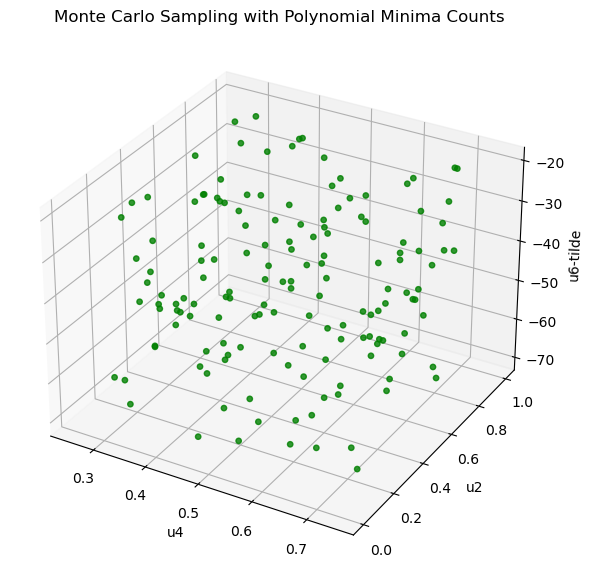

In [13]:
num_samples = 150
k_steps = 15  #determine the k steps, here we choose 20 between 3.8 and 0
k_min= 0.08
k_max=3.5
k_vals = np.linspace(k_min,k_max,k_steps)[::-1]
u2_vals = np.random.uniform(0, 1,(num_samples))
u4_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_tilde_vals = np.random.uniform(-70, -20,(num_samples))
print(u2_vals, u4_vals, u6_vals, u6_tilde_vals)
monte_carlo_save(k_vals,u2_vals, u4_vals, u6_vals, u6_tilde_vals,"monte_carlo_plot9.jpg")

[-0.41855541 -0.50320777 -0.03828586 -0.63161836 -0.49377082 -0.72281398
 -0.51586093 -0.06352887 -0.30144684 -0.63352302 -0.47327043 -0.84184346
 -0.15054407 -0.01927447 -0.43134168 -0.81666416 -0.41801817 -0.27233446
 -0.99268248 -0.61085163 -0.73984333 -0.75262409 -0.5936028  -0.44276272
 -0.34316685 -0.2991882  -0.83567749 -0.23752089 -0.8832514  -0.47254271
 -0.62571844 -0.52031643 -0.89322438 -0.96362535 -0.33650852 -0.27640222
 -0.83039161 -0.97024722 -0.19368456 -0.34532258 -0.78987496 -0.90752841
 -0.87261516 -0.91369284 -0.68952246 -0.53493589 -0.4873892  -0.26935233
 -0.53874497 -0.02324775 -0.73896756 -0.09661674 -0.62140706 -0.35993218
 -0.61914727 -0.56270662 -0.5363522  -0.34369432 -0.55778803 -0.33815099
 -0.70521468 -0.70002403 -0.88968259 -0.99627763 -0.85007911 -0.94379686
 -0.1094561  -0.46627656 -0.47958322 -0.15795675 -0.35738353 -0.56241197
 -0.88089286 -0.13254079 -0.17193858 -0.49202157 -0.22931255 -0.022509
 -0.82066157 -0.92796044 -0.79564641 -0.06729608 -0.9

7 0.7199999999999999
0.051729831625031426
7 0.6399999999999999
0.051534968234800506
7 0.5599999999999999
0.05127345551925111
7 0.4799999999999999
0.05094690333447112
7 0.39999999999999997
0.05055740024264455
7 0.31999999999999995
0.05010927369958214
7 0.24
0.0496112540349745
7 0.15999999999999998
0.04908326151397957
[0, 1, 0, 0]
8 1.2
Solver failed at k=1.2, returning failure value nan
nan
9 1.2
Solver failed at k=1.2, returning failure value nan
nan
10 1.2
Solver failed at k=1.2, returning failure value nan
nan
11 1.2
Solver failed at k=1.2, returning failure value nan
nan
12 1.2
-0.11988810605698742
12 1.1199999999999999
-0.121057151281825
12 1.0399999999999998
-0.12233029215772566
12 0.9599999999999999
-0.12371804499464599
12 0.8799999999999998
-0.12523570440710402
12 0.7999999999999998
-0.12690511281105168
12 0.7199999999999999
-0.12876023318589785
12 0.6399999999999999
-0.13086473067040752
12 0.5599999999999999
-0.1334059334566379
[0, 1, 0, 0]
13 1.2
0.04201803417955719
13 1.11999

67 1.1199999999999999
-0.38619259447873144
67 1.0399999999999998
-0.3870650713311231
67 0.9599999999999999
-0.3882346732224558
67 0.8799999999999998
-0.3898095029618045
[0, 1, 0, 0]
68 1.2
Solver failed at k=1.2, returning failure value nan
nan
69 1.2
-0.17733239660757563
69 1.1199999999999999
Solver failed at k=1.1199999999999999, returning failure value nan
nan
70 1.2
-0.28130114875921325
70 1.1199999999999999
-0.281968044892362
70 1.0399999999999998
-0.28280919557910783
70 0.9599999999999999
-0.2838574746909068
70 0.8799999999999998
-0.2851635098162298
70 0.7999999999999998
-0.2868152477255724
70 0.7199999999999999
-0.28901342292920723
[0, 1, 0, 0]
71 1.2
-0.5248153992087193
71 1.1199999999999999
-0.5282213470021845
[0, 1, 0, 0]
72 1.2
Solver failed at k=1.2, returning failure value nan
nan
73 1.2
Solver failed at k=1.2, returning failure value nan
nan
74 1.2
-0.08836751369064497
74 1.1199999999999999
-0.08979739490532188
74 1.0399999999999998
-0.09139739110346214
74 0.9599999999999

-0.03705983861356189
124 0.7999999999999998
-0.03717463729786781
124 0.7199999999999999
-0.03738367588503686
124 0.6399999999999999
-0.037693048429060266
124 0.5599999999999999
-0.03811108899237455
124 0.4799999999999999
-0.03865107826327216
124 0.39999999999999997
-0.039334794531735884
124 0.31999999999999995
-0.040203395639704737
[0, 1, 0, 0]
125 1.2
Solver failed at k=1.2, returning failure value nan
nan
126 1.2
-0.053817172947965806
126 1.1199999999999999
-0.05323389477341962
126 1.0399999999999998
-0.052722433964662814
126 0.9599999999999999
-0.05228212424470541
126 0.8799999999999998
-0.051913054152872964
126 0.7999999999999998
-0.051619268102350235
126 0.7199999999999999
-0.05140450950892308
126 0.6399999999999999
-0.05126981256658957
126 0.5599999999999999
-0.051220600575080946
126 0.4799999999999999
-0.05126694818805213
126 0.39999999999999997
-0.05142339011224071
126 0.31999999999999995
-0.051715931496961444
126 0.24
-0.052200628770893126
[0, 1, 0, 0]
127 1.2
-0.3018406917301

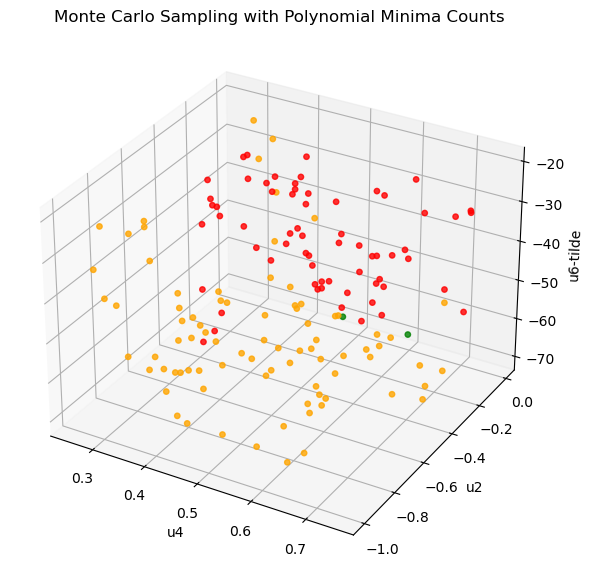

In [154]:
num_samples = 150
k_steps = 15  #determine the k steps, here we choose 20 between 3.8 and 0
k_min= 0.08
k_max=1.2
k_vals = np.linspace(k_min,k_max,k_steps)[::-1]
u2_vals = np.random.uniform(-1, 0,(num_samples))
u4_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_tilde_vals = np.random.uniform(-70, -20,(num_samples))
print(u2_vals, u4_vals, u6_vals, u6_tilde_vals)
monte_carlo_save(k_vals,u2_vals, u4_vals, u6_vals, u6_tilde_vals,"monte_carlo_plot4.jpg")

[0.95955191 0.71157058 0.26043828 0.39201258 0.90669598 0.78231615
 0.8475112  0.24344637 0.66725498 0.2997693  0.00537669 0.02984406
 0.62398479 0.45617947 0.80727298 0.14360953 0.68306143 0.3670214
 0.77058776 0.87374564 0.51473884 0.70060494 0.14207258 0.96804899
 0.74171074 0.39216617 0.83131443 0.23517609 0.4233264  0.60386112
 0.19467819 0.39767127 0.52141832 0.27791622 0.50179826 0.29679031
 0.02100243 0.94960779 0.26495376 0.21087945 0.72121746 0.58579131
 0.4991356  0.66082492 0.04461809 0.43923803 0.98848256 0.42835164
 0.01896404 0.66402605 0.41213062 0.13044933 0.39412219 0.84011005
 0.19125607 0.1358686  0.5353539  0.55459603 0.0642057  0.15894198
 0.00131962 0.61171969 0.16381904 0.29781488 0.33081815 0.03038579
 0.66791569 0.25078909 0.10882174 0.53221373 0.05815957 0.63316866
 0.3402257  0.39247416 0.87735441 0.2922146  0.10207269 0.92405859
 0.92964551 0.467109   0.02831167 0.31282591 0.52344134 0.76950073
 0.12463658 0.78280251 0.21764851 0.86204114 0.50350669 0.04397

0.7343486240857353
[0, 0, 1, 0]
67 2.5
0.26308183759699155
67 2.327142857142857
0.25777890182471513
[0, 0, 1, 0]
68 2.5
0.11359703484243194
68 2.327142857142857
0.1071516607669057
[0, 0, 1, 0]
69 2.5
0.5813139870970564
[0, 0, 1, 0]
70 2.5
0.11778949195501442
70 2.327142857142857
0.11631389173639597
[0, 0, 1, 0]
71 2.5
0.6919667834261604
[0, 0, 1, 0]
72 2.5
0.38353330271037334
[0, 0, 1, 0]
73 2.5
0.43631138101102335
[0, 0, 1, 0]
74 2.5
0.9181418556562981
[0, 0, 1, 0]
75 2.5
0.32417010394999246
75 2.327142857142857
0.320105794312972
[0, 0, 1, 0]
76 2.5
0.09463225981418621
76 2.327142857142857
0.08703030743903484
[0, 0, 1, 0]
77 2.5
0.9623211646601748
[0, 0, 1, 0]
78 2.5
0.9783960173694514
[0, 0, 1, 0]
79 2.5
0.4821728901760552
[0, 0, 1, 0]
80 2.5
0.07964744421874881
80 2.327142857142857
0.0756990132446717
[0, 0, 1, 0]
81 2.5
0.3364666577099675
81 2.327142857142857
0.3324991535488631
[0, 0, 1, 0]
82 2.5
0.570689255759046
[0, 0, 1, 0]
83 2.5
0.8194696737787395
[0, 0, 1, 0]
84 2.5
0.1567912

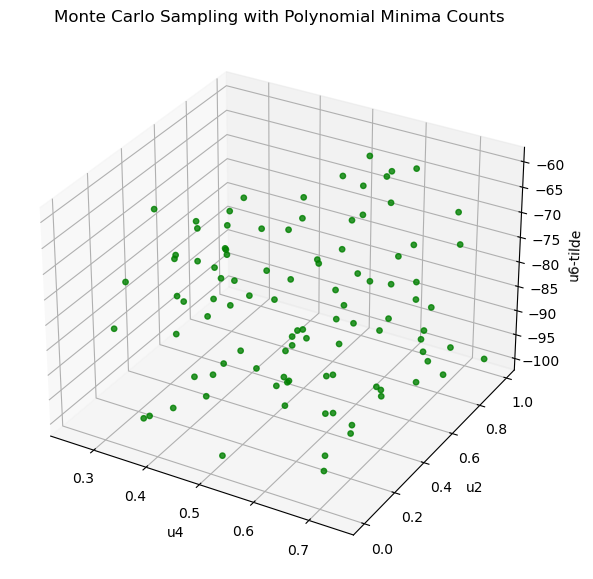

In [14]:
num_samples = 100
k_steps = 15  #determine the k steps, here we choose 20 between 3.8 and 0
k_min= 0.08
k_max=2.5
k_vals = np.linspace(k_min,k_max,k_steps)[::-1]
u2_vals = np.random.uniform(0, 1,(num_samples))
u4_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_vals = np.random.uniform(0.25, 0.75,(num_samples))
u6_tilde_vals = np.random.uniform(-100, -60,(num_samples))
print(u2_vals, u4_vals, u6_vals, u6_tilde_vals)
monte_carlo_save(k_vals,u2_vals, u4_vals, u6_vals, u6_tilde_vals,"monte_carlo_plot10.jpg")

-0.05420156511815777 0.6848994087081544 0.6783703380372115 -73.42107218433841


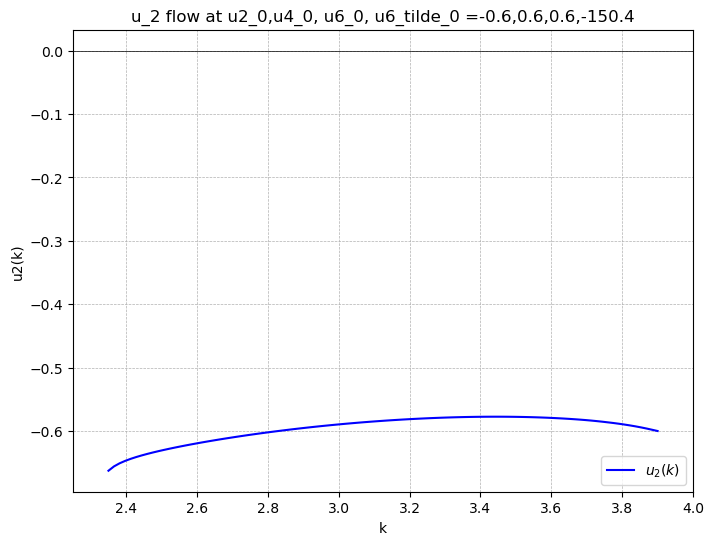

In [150]:
import matplotlib.pyplot as plt
print(u2_vals[0], u4_vals[0], u6_vals[0], u6_tilde_vals[0])
#u2_0, u4_0, u6_0, u6_tilde_0 = u2_vals[0], u4_vals[0], u6_vals[0], u6_tilde_vals[0]
u2_0, u4_0, u6_0, u6_tilde_0 = -0.6, 0.6, 0.6, -150.4
k_target = 2.35
k_values = np.linspace(3.9, k_target, 100)
solution = solve_ivp(system, (3.9, k_target), [u2_0, u4_0, u6_0, u6_tilde_0], t_eval=k_values, method='LSODA')
u2_values = solution.y[0]
plt.figure(figsize=(8, 6))
plt.plot(k_values, u2_values, label=r'$u_2(k)$', color='b')
plt.xlabel("k")
plt.ylabel("u2(k)")
plt.title("u_2 flow at u2_0,u4_0, u6_0, u6_tilde_0 ="+  str(round(u2_0,2)) + "," + str(round(u4_0,2)) + "," + str(round(u6_0,2))+ "," + str(round(u6_tilde_0,2)))
plt.xlim(k_target-0.1, 4)
#plt.ylim(-0.8, -0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


-0.8315426789169972 0.610775895434891 0.33327170434764714 -13.84587413815441


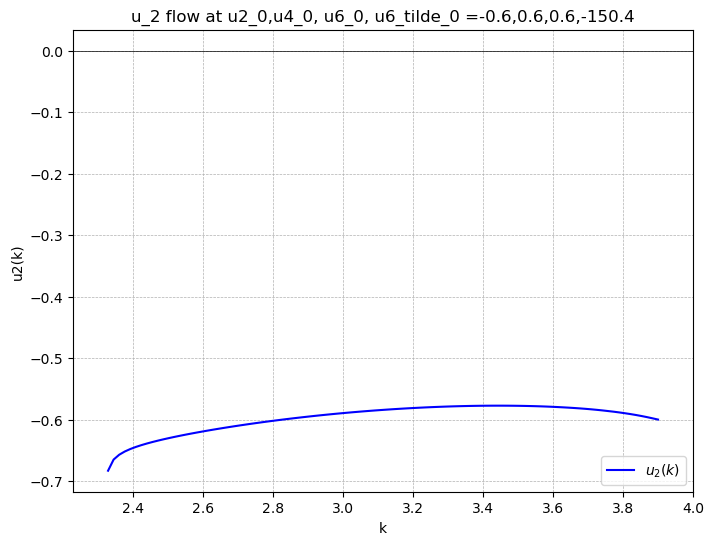

In [14]:
import matplotlib.pyplot as plt
print(u2_vals[0], u4_vals[0], u6_vals[0], u6_tilde_vals[0])
#u2_0, u4_0, u6_0, u6_tilde_0 = u2_vals[0], u4_vals[0], u6_vals[0], u6_tilde_vals[0]
u2_0, u4_0, u6_0, u6_tilde_0 = -0.6, 0.6, 0.6, -150.4
k_target = 2.33
k_values = np.linspace(3.9, k_target, 100)
solution = solve_ivp(system, (3.9, k_target), [u2_0, u4_0, u6_0, u6_tilde_0], t_eval=k_values, method='LSODA')
u2_values = solution.y[0]
plt.figure(figsize=(8, 6))
plt.plot(k_values, u2_values, label=r'$u_2(k)$', color='b')
plt.xlabel("k")
plt.ylabel("u2(k)")
plt.title("u_2 flow at u2_0,u4_0, u6_0, u6_tilde_0 ="+  str(round(u2_0,2)) + "," + str(round(u4_0,2)) + "," + str(round(u6_0,2))+ "," + str(round(u6_tilde_0,2)))
plt.xlim(k_target-0.1, 4)
#plt.ylim(-0.8, -0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [ ]:
u4,u6,u6_tilde= u4_0, u6_0, u6_tilde_0 
k,u2= k_values[-1], u2_values[-1]
print(k_values[95],k_values[66],k_values[33],k_values[0])
a,b,c,d = U1(k_values[-1], u2_values[-1],u6_tilde),U1(k_values[66], u2_values[66],u6_tilde),U1(k_values[33], u2_values[33],u6_tilde),U1(k_values[0], u2_values[0],u6_tilde)
#a,b,c,d = U2(k_values[-1], u2_values[-1],u4,u6,u6_tilde),U2(k_values[66], u2_values[66],u4,u6,u6_tilde),U2(k_values[33], u2_values[33],u4,u6,u6_tilde),U2(k_values[0], u2_values[0],u4,u6,u6_tilde)
#a,b,c,d = U3(k_values[-1], u2_values[-1],u6_tilde),U3(k_values[66], u2_values[66],u6_tilde),U3(k_values[33], u2_values[33],u6_tilde),U3(k_values[0], u2_values[0],u6_tilde)
#a,b,c,d = U4(k_values[-1], u2_values[-1],u6_tilde),U4(k_values[66], u2_values[66],u6_tilde),U4(k_values[33], u2_values[33],u6_tilde),U4(k_values[0], u2_values[0],u6_tilde)
Potentials={str(round(k_values[-1],3)):a,str(round(k_values[66],3)):b,str(round(k_values[33],3)):c,str(round(k_values[0],3)):d}
plot_sympy_functions(Potentials, x_range=(-100,0),title="U1 at 4 different ks: u2_0,u4_0, u6_0, u6_tilde_0 ="+  str(round(u2_0,2)) + "," + str(round(u4_0,2)) + "," + str(round(u6_0,2))+ "," + str(round(u6_tilde_0,2)))
print(count_minima_below_zero(a),count_minima_below_zero(b),count_minima_below_zero(c),count_minima_below_zero(d))


In [ ]:
u4,u6,u6_tilde= u4_0, u6_0, u6_tilde_0 
k,u2= k_values[-1], u2_values[-1]
print(k_values[-1],k_values[66],k_values[33],k_values[0])
#a,b,c,d = U1(k_values[-1], u2_values[-1],u6_tilde),U1(k_values[66], u2_values[66],u6_tilde),U1(k_values[33], u2_values[33],u6_tilde),U1(k_values[0], u2_values[0],u6_tilde)
a,b,c,d = U2(k_values[-1], u2_values[-1],u4,u6,u6_tilde),U2(k_values[66], u2_values[66],u4,u6,u6_tilde),U2(k_values[33], u2_values[33],u4,u6,u6_tilde),U2(k_values[0], u2_values[0],u4,u6,u6_tilde)
#a,b,c,d = U3(k_values[-1], u2_values[-1],u6_tilde),U3(k_values[66], u2_values[66],u6_tilde),U3(k_values[33], u2_values[33],u6_tilde),U3(k_values[0], u2_values[0],u6_tilde)
#a,b,c,d = U4(k_values[-1], u2_values[-1],u6_tilde),U4(k_values[66], u2_values[66],u6_tilde),U4(k_values[33], u2_values[33],u6_tilde),U4(k_values[0], u2_values[0],u6_tilde)
Potentials={str(round(k_values[-1],3)):a,str(round(k_values[66],3)):b,str(round(k_values[33],3)):c,str(round(k_values[0],3)):d}
plot_sympy_functions(Potentials, x_range=(-100,0),title="U2 at 4 different ks: u2_0,u4_0, u6_0, u6_tilde_0 ="+  str(round(u2_0,2)) + "," + str(round(u4_0,2)) + "," + str(round(u6_0,2))+ "," + str(round(u6_tilde_0,2)))
print(count_minima_below_zero(a),count_minima_below_zero(b),count_minima_below_zero(c),count_minima_below_zero(d))


In [ ]:
u4,u6,u6_tilde= u4_0, u6_0, u6_tilde_0 
k,u2= k_values[-1], u2_values[-1]
k1,k2,k3,k4= 0,33,66,99
print(k_values[k1],k_values[k2],k_values[k3],k_values[k4])
#a,b,c,d = U1(k_values[-1], u2_values[-1],u6_tilde),U1(k_values[66], u2_values[66],u6_tilde),U1(k_values[33], u2_values[33],u6_tilde),U1(k_values[0], u2_values[0],u6_tilde)
#a,b,c,d = U2(k_values[-1], u2_values[-1],u4,u6,u6_tilde),U2(k_values[66], u2_values[66],u4,u6,u6_tilde),U2(k_values[33], u2_values[33],u4,u6,u6_tilde),U2(k_values[0], u2_values[0],u4,u6,u6_tilde)
a,b,c,d = U3(k_values[k1], u2_values[k1],u6_tilde),U3(k_values[k2], u2_values[k2],u6_tilde),U3(k_values[k3], u2_values[k3],u6_tilde),U3(k_values[k4], u2_values[k4],u6_tilde)
#a,b,c,d = U4(k_values[-1], u2_values[-1],u6_tilde),U4(k_values[66], u2_values[66],u6_tilde),U4(k_values[33], u2_values[33],u6_tilde),U4(k_values[0], u2_values[0],u6_tilde)
Potentials={str(round(k_values[k1],3)):a,str(round(k_values[k2],3)):b,str(round(k_values[k3],3)):c,str(round(k_values[k4],3)):d}
plot_sympy_functions(Potentials, x_range=(-100,0),title="U3 at 4 different ks: u2_0,u4_0, u6_0, u6_tilde_0 ="+  str(round(u2_0,2)) + "," + str(round(u4_0,2)) + "," + str(round(u6_0,2))+ "," + str(round(u6_tilde_0,2)))
print(count_minima_below_zero(a),count_minima_below_zero(b),count_minima_below_zero(c),count_minima_below_zero(d))
